In [1]:
"""MNIST dataset, build basic neural network
   - 28*28 image
   - 784 pixels
   - x = [img1, |     i.e [784pixels,
          img2,            784pixels,
          img3,            ., 
          .,               .,
          .]               .,]
    - xT = [img1, img2, img3] (each column represents 1 image (784 rows, n cols))
    
    - 1st input layer should be 784 nodes as 784 rows
    
"""

'MNIST dataset, build basic neural network\n   - 28*28 image\n   - 784 pixels\n   - x = [img1, |     i.e [784pixels,\n          img2,            784pixels,\n          img3,            ., \n          .,               .,\n          .]               .,]\n    - xT = [img1, img2, img3] (each column represents 1 image (784 rows, n cols))\n    \n    - 1st input layer should be 784 nodes as 784 rows\n    \n'

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('../input/mnist-digit-recognizer/train.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 784 columns in 1 row shows 1 image,
### 42000 images available

In [5]:
print(data.shape)

(42000, 785)


In [6]:
#convert data to numpy array
data = np.array(data)

In [7]:
type(data)

numpy.ndarray

In [8]:
rows, cols = data.shape
np.random.shuffle(data)

#separate dev/test data
dev_data = data[:1000].T
y_dev = dev_data[0] # labels
x_dev = dev_data[1:] # pixels
x_dev = x_dev / 255. # normalizing pixels

#separate train data
train_data = data[1000:].T
y_train = train_data[0] # labels
x_train = train_data[1:] # pixels
x_train = x_train / 255. # normalizing pixels

In [9]:
#keeping labels separately to be used for one-hot encoding
label_range = set(list(y_dev) + list(y_train))
print(label_range)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [10]:
x_train.shape

(784, 41000)

In [11]:
class numpy_nn:
    def __init__(self, X=None, Y = None, alpha = None):
        #1st hidden layer has 10 nodes,
        #784 pixels as input to the layer.
        #(W.XT)
        self.W1 = np.random.rand(10, 784) - 0.5
        self.B1 = np.random.rand(10, 1) - 0.5
        
        #2nd layer has 10 nodes, 1st layer output nodes are 10
        self.W2 = np.random.rand(10, 10) - 0.5
        self.B2 = np.random.rand(10, 1) - 0.5
        
        self.Z1 = None
        self.A1 = None
        self.Z2 = None
        self.A2 = None
        
        self.alpha = alpha
        
        self.labels = Y
        self.X = X
        
    def forward_prop(self):
        #1st hidden layer
        self.Z1 = self.W1.dot(self.X) + self.B1
        self.A1 = self.relu(self.Z1)
        
        #2nd hidden layer
        self.Z2 = self.W2.dot(self.A1) + self.B2
        self.A2 = self.softmax(self.Z2)
    
    def relu(self, Z):
        return np.maximum(Z, 0)
    
    def softmax(self, z):
        a = np.exp(z) / sum(np.exp(z))
        return a
    
    def backward_prop(self):
        m = self.labels.size
        one_hot_y = self.one_hot_encod()
        dz2 = self.A2 - one_hot_y
        dw2 = (1 / m) * dz2.dot(self.A1.T)
        db2 = (1 / m) * np.sum(dz2)
        
        dz1 = self.W2.T.dot(dz2) * self.deriv_relu(self.Z1)
        dw1 = (1 / m) * dz1.dot(self.X.T)
        db1 = (1 / m) * np.sum(dz1)        
       
        #after backpropagation, update the parameters
        self.__update_params(dw1, db1, dw2, db2)
    
    def one_hot_encod(self):
        #each row = label encoded
        #col size = max classes available
        one_hot_shape = (self.labels.size, len(label_range))
        one_hot_y = np.zeros(one_hot_shape)
        one_hot_y[np.arange(self.labels.size), self.labels] = 1
        return one_hot_y.T
    
    def deriv_relu(self, Z):
        return Z > 0
    
    def __update_params(self, dw1, db1, dw2, db2):
        self.W1 = self.W1 - self.alpha * dw1
        self.B1 = self.B1 - self.alpha * db1
        
        self.W2 = self.W2 - self.alpha * dw2
        self.B2 = self.B2 - self.alpha * db2
    
    def get_accuracy(self):
        predictions = self._get_predictions()
        return np.sum(predictions == self.labels) / self.labels.size
    
    def _get_predictions(self,):
        return np.argmax(self.A2, 0)
        

In [12]:
"""
    This function calls the neural net class and runs iterations
    - forward propagation
    - backward propagation
    - update parameters
"""
def gradient_descent(X, Y, iterations):
    for i in range(iterations):
        neural_net_init.forward_prop()
        neural_net_init.backward_prop()
        if i%50==0:
            print('Iterations: {}'.format(i))
            print("Accuracy: {}".format(neural_net_init.get_accuracy()))
        

In [13]:
iterations = 500
alpha = 0.10
#gloabally call the model since it will be used later for testing
neural_net_init = numpy_nn(x_train, y_train, alpha)
gradient_descent(x_train, y_train, iterations)

Iterations: 0
Accuracy: 0.09046341463414634
Iterations: 50
Accuracy: 0.47873170731707315
Iterations: 100
Accuracy: 0.6691219512195122
Iterations: 150
Accuracy: 0.7469024390243902
Iterations: 200
Accuracy: 0.7856829268292683
Iterations: 250
Accuracy: 0.8069024390243903
Iterations: 300
Accuracy: 0.8210243902439024
Iterations: 350
Accuracy: 0.8320975609756097
Iterations: 400
Accuracy: 0.8391219512195122
Iterations: 450
Accuracy: 0.8465121951219512


Predicted label: [3]
Actual label: [5]


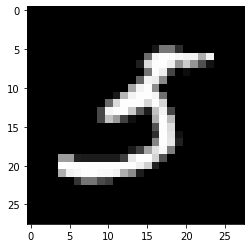

In [14]:
# for testing on trained dataset first
def trial():
    _, m = x_dev.shape
    index = np.random.randint(m +1, size=1)
    current_image = x_dev[:, int(index), None]
    label = y_dev[index]
    #to make prediction use the model which has the weights and biases saved
    neural_net_init.X = current_image
    neural_net_init.labels = label

    #only feed forward is required to check the prediction
    neural_net_init.forward_prop()
    prediction = neural_net_init._get_predictions()
    print("Predicted label: {}".format(prediction))
    print("Actual label: {}".format(label))

    #display the image
    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

trial()

In [15]:
# Check accuracy on the test set, images which model has not yet seen
image_set = x_dev
label = y_dev
#to make prediction use the model which has the weights and biases saved
neural_net_init.X = image_set
neural_net_init.labels = label

#only feed forward is required to check the prediction
neural_net_init.forward_prop()
accuracy = neural_net_init.get_accuracy()
print("accuracy : {}".format(accuracy))


accuracy : 0.844
